<a href="https://colab.research.google.com/github/mauricionoris/25B3_ml/blob/master/colabs/RegressaoLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Logística

A **Regressão Logística** é um algoritmo de aprendizado supervisionado usado principalmente para **classificação binária** (quando a variável alvo possui apenas dois valores possíveis, como *sim/não*, *0/1*, *positivo/negativo*).

Apesar do nome conter “regressão”, o objetivo **não** é prever valores numéricos contínuos, e sim **probabilidades** de ocorrência de um evento.

---

## 1. Motivação

Imagine que queremos prever se um cliente vai comprar (*1*) ou não (*0*) um produto, com base em sua idade e renda.
A **regressão linear** não é adequada porque pode gerar valores menores que 0 ou maiores que 1.
A **regressão logística** resolve isso usando uma função **sigmóide** para transformar qualquer valor real em uma probabilidade entre 0 e 1.

---

## 2. Função Sigmóide

A função sigmóide (ou logística) é definida como:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

* Quando $z \to +\infty$, $\sigma(z) \to 1$
* Quando $z \to -\infty$, $\sigma(z) \to 0$
* Quando $z = 0$, $\sigma(z) = 0.5$

---

## 3. Modelo Matemático

Na regressão logística, calculamos primeiro uma **combinação linear** das variáveis de entrada:

$$
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n
$$

Depois, aplicamos a função sigmóide:

$$
\hat{p} = \sigma(z) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_n x_n)}}
$$

Aqui:

* $\hat{p}$ é a **probabilidade estimada** de a observação pertencer à classe positiva.
* A previsão final é obtida usando um **limiar** (geralmente 0,5):

  * Se $\hat{p} \geq 0,5$ → classe **1**
  * Caso contrário → classe **0**

---

## 4. Função de Custo

Ao invés do **erro quadrático médio** usado na regressão linear, a regressão logística utiliza a **função de log-verossimilhança**:

$$
J(\beta) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)}) \right]
$$

Essa função penaliza mais fortemente previsões muito erradas, tornando-a adequada para problemas de classificação.

---

## 5. Treinamento

O treinamento consiste em **ajustar os coeficientes $\beta$** para minimizar a função de custo.
O método mais comum para isso é o **Gradiente Descendente**:

1. Inicializar $\beta$ com valores aleatórios ou zeros.
2. Calcular a previsão $\hat{p}$ para todos os exemplos.
3. Atualizar $\beta$ segundo a regra:

$$
\beta_j := \beta_j - \alpha \cdot \frac{\partial J(\beta)}{\partial \beta_j}
$$

4. Repetir até a convergência.

---

## 6. Exemplo em Python

```python
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Criar dataset
X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                           n_redundant=0, random_state=42)

# Dividir treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Predições
y_pred = model.predict(X_test)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
```

---

## 7. Vantagens

* Simples e interpretável.
* Produz probabilidades além das previsões de classe.
* Bom desempenho em problemas lineares e datasets pequenos.

---

## 8. Limitações

* Assume relação **linear** entre as variáveis independentes e o **log-odds**.
* Não é ideal para problemas com limites de decisão muito complexos.
* Sensível a multicolinearidade entre variáveis.

---

## 9. Expansões

* **Regressão logística multinomial**: para classificação com mais de duas classes.
* **Regularização L1/L2**: para evitar overfitting.
* **Classificadores lineares generalizados**: modelos mais flexíveis.




Acurácia no conjunto de teste: 0.9600


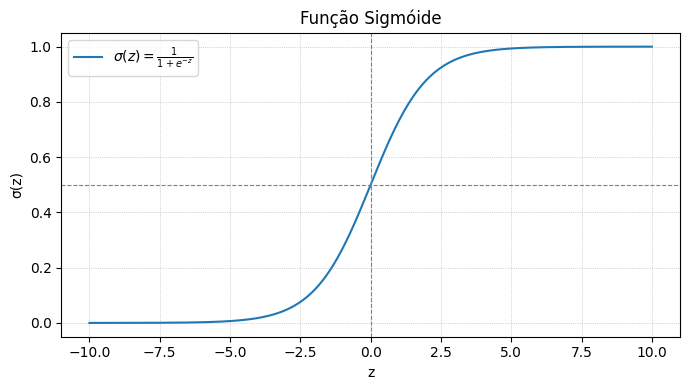

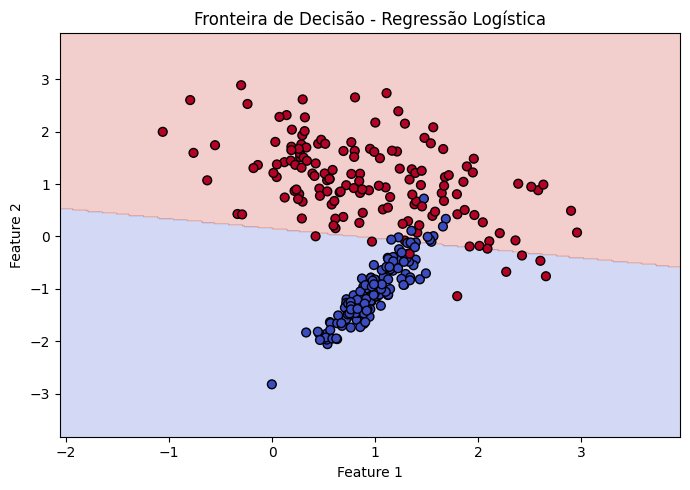

Coeficientes (beta): [[0.59691356 3.19145294]]
Intercepto (beta0): [-0.46861793]


In [1]:
# regressao_logistica_plots.py
# Código pronto para Jupyter/Colab ou execução direta (recomendo usar um ambiente com display gráfico)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# -------------------------
# 1) Plot da função sigmóide
# -------------------------
def plot_sigmoid(save_path=None):
    z = np.linspace(-10, 10, 400)
    sigmoid = 1 / (1 + np.exp(-z))

    plt.figure(figsize=(7, 4))
    plt.plot(z, sigmoid, label=r'$\sigma(z)=\frac{1}{1+e^{-z}}$')
    plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.8)
    plt.axvline(0.0, color='gray', linestyle='--', linewidth=0.8)
    plt.xlabel('z')
    plt.ylabel('σ(z)')
    plt.title('Função Sigmóide')
    plt.legend()
    plt.grid(True, linestyle=':', linewidth=0.5)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=150)
    plt.show()

# -------------------------
# 2) Fronteira de decisão
# -------------------------
def plot_decision_boundary(X, y, model, save_path=None):
    # cria grade
    x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    # predição na grade
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z, alpha=0.25, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm, s=40)
    plt.title('Fronteira de Decisão - Regressão Logística')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=150)
    plt.show()

# -------------------------
# 3) Exemplo completo: criar dados, treinar e plotar
# -------------------------
def example_run(random_state=42, save_figs=False):
    # criar dataset 2D
    X, y = make_classification(n_samples=300,
                               n_features=2,
                               n_redundant=0,
                               n_informative=2,
                               n_clusters_per_class=1,
                               class_sep=1.0,
                               random_state=random_state)

    # dividir em treino/teste
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25,
                                                        random_state=random_state)

    # treinar Regressão Logística
    model = LogisticRegression(solver='lbfgs')
    model.fit(X_train, y_train)

    # avaliar
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'Acurácia no conjunto de teste: {acc:.4f}')

    # plotar sigmóide
    plot_sigmoid(save_path='sigmoid.png' if save_figs else None)

    # plotar fronteira de decisão (usando TODO o conjunto X completo para visualização)
    plot_decision_boundary(X, y, model, save_path='decision_boundary.png' if save_figs else None)

    # opcional: mostrar coeficientes e intercepto
    print('Coeficientes (beta):', model.coef_)
    print('Intercepto (beta0):', model.intercept_)

if __name__ == '__main__':
    # Rode example_run() diretamente; ajuste save_figs=True para salvar imagens em disco.
    example_run(save_figs=False)
